# Car Accident Severity Project

In [1]:
import pandas as pd #load pandas library
import numpy as np #load numpy library 

car_accidents=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below is a sample of the data:

In [2]:
car_accidents.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print(car_accidents.columns)
print(car_accidents.dtypes)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      ob

In [4]:
car_accidents.describe(include ="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
car_accidents[['LIGHTCOND','WEATHER','ROADCOND','JUNCTIONTYPE','COLLISIONTYPE','SPEEDING']].describe(include ="object")

,LIGHTCOND,WEATHER,ROADCOND,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING
count,189503,189592,189661,188344,189769,9333
unique,9,11,9,7,10,1
top,Daylight,Clear,Dry,Mid-Block (not related to intersection),Parked Car,Y
freq,116137,111135,124510,89800,47987,9333


In [6]:
car_accidents[['SEVERITYCODE','SEVERITYDESC']]

,SEVERITYCODE,SEVERITYDESC
0,2,Injury Collision
1,1,Property Damage Only Collision
2,1,Property Damage Only Collision
3,1,Property Damage Only Collision
4,2,Injury Collision
5,1,Property Damage Only Collision
6,1,Property Damage Only Collision
7,2,Injury Collision
8,1,Property Damage Only Collision
9,2,Injury Collision


As indicated above, the severity code consists of two values: 
- SEVERITYCODE=1 means Property Damage Only Collision
- SEVERITYCODE=2 means Injury Collision

In [7]:
df=car_accidents[['LIGHTCOND','WEATHER','ROADCOND','JUNCTIONTYPE','COLLISIONTYPE','SPEEDING','SEVERITYCODE']]
df.head(5)

,LIGHTCOND,WEATHER,ROADCOND,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING,SEVERITYCODE
0,Daylight,Overcast,Wet,At Intersection (intersection related),Angles,NaN,2
1,Dark - Street Lights On,Raining,Wet,Mid-Block (not related to intersection),Sideswipe,NaN,1
2,Daylight,Overcast,Dry,Mid-Block (not related to intersection),Parked Car,NaN,1
3,Daylight,Clear,Dry,Mid-Block (not related to intersection),Other,NaN,1
4,Daylight,Raining,Wet,At Intersection (intersection related),Angles,NaN,2


In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [9]:
df["LIGHTCOND"].dropna(axis=0,inplace=True)
df["ROADCOND"].dropna(axis=0,inplace=True)
df["WEATHER"].dropna(axis=0,inplace=True)
df["JUNCTIONTYPE"].dropna(axis=0,inplace=True)
df["COLLISIONTYPE"].dropna(axis=0,inplace=True)
df["SPEEDING"].dropna(axis=0,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/series.py:4299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [10]:
light=df['LIGHTCOND'].value_counts().to_frame()
light

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [11]:
weather=df['WEATHER'].value_counts().to_frame()
weather

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [12]:
road=df['ROADCOND'].value_counts().to_frame()
road

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [13]:
junction=df['JUNCTIONTYPE'].value_counts().to_frame()
junction

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [14]:
collision=df['COLLISIONTYPE'].value_counts().to_frame()
collision

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [15]:
speeding=df['SPEEDING'].value_counts().to_frame()
speeding

,SPEEDING
Y,9333


In [16]:
df=df[['LIGHTCOND','WEATHER','ROADCOND','JUNCTIONTYPE','COLLISIONTYPE','SEVERITYCODE']] #dropped SPEEDING
df.head(5)

,LIGHTCOND,WEATHER,ROADCOND,JUNCTIONTYPE,COLLISIONTYPE,SEVERITYCODE
0,Daylight,Overcast,Wet,At Intersection (intersection related),Angles,2
1,Dark - Street Lights On,Raining,Wet,Mid-Block (not related to intersection),Sideswipe,1
2,Daylight,Overcast,Dry,Mid-Block (not related to intersection),Parked Car,1
3,Daylight,Clear,Dry,Mid-Block (not related to intersection),Other,1
4,Daylight,Raining,Wet,At Intersection (intersection related),Angles,2


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

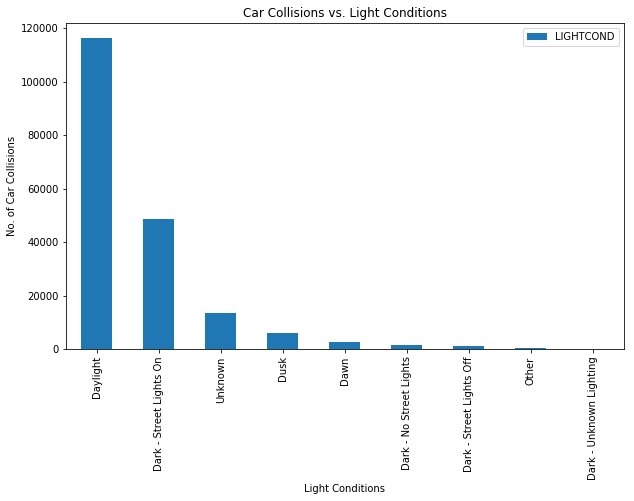

In [18]:
light.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Light Conditions') # add to x-label to the plot
plt.ylabel('No. of Car Collisions') # add y-label to the plot
plt.title('Car Collisions vs. Light Conditions') # add title to the plot

plt.show()

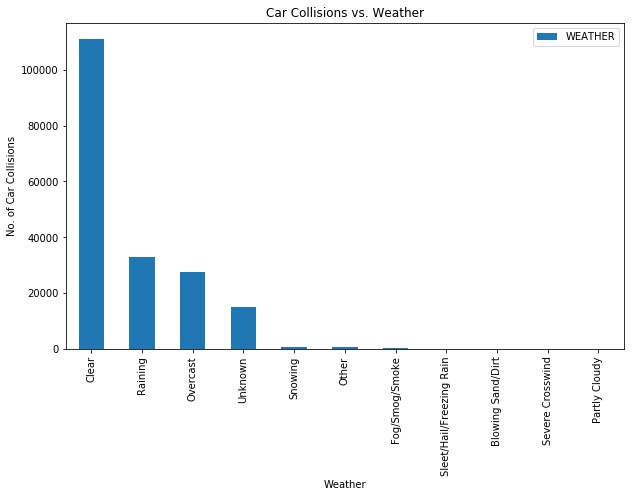

In [19]:
weather.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Weather') # add to x-label to the plot
plt.ylabel('No. of Car Collisions') # add y-label to the plot
plt.title('Car Collisions vs. Weather') # add title to the plot

plt.show()

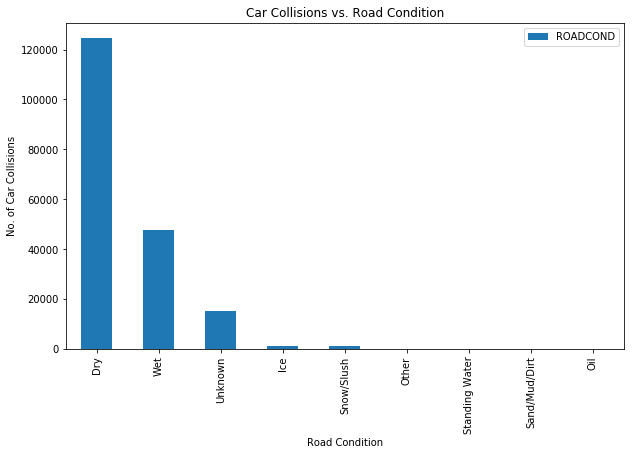

In [20]:
road.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Road Condition') # add to x-label to the plot
plt.ylabel('No. of Car Collisions') # add y-label to the plot
plt.title('Car Collisions vs. Road Condition') # add title to the plot

plt.show()

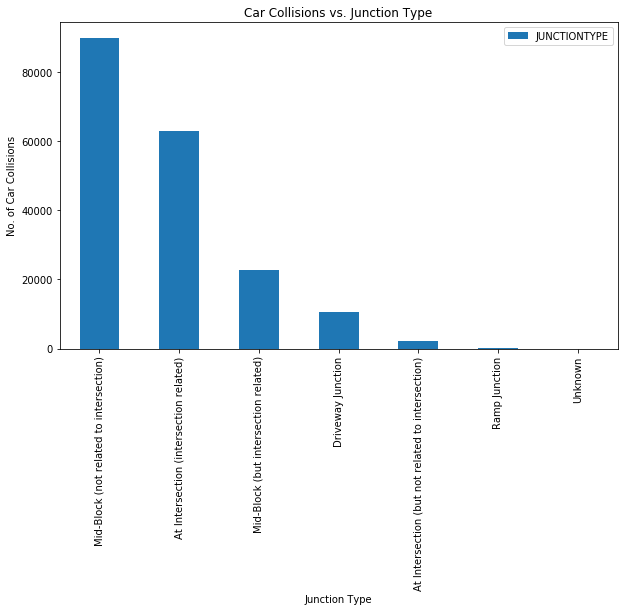

In [21]:
junction.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Junction Type') # add to x-label to the plot
plt.ylabel('No. of Car Collisions') # add y-label to the plot
plt.title('Car Collisions vs. Junction Type') # add title to the plot

plt.show()

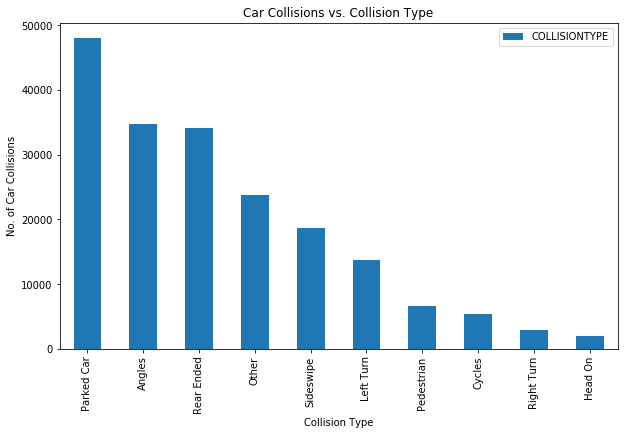

In [22]:
collision.plot(kind='bar',figsize=(10, 6))

plt.xlabel('Collision Type') # add to x-label to the plot
plt.ylabel('No. of Car Collisions') # add y-label to the plot
plt.title('Car Collisions vs. Collision Type') # add title to the plot

plt.show()

In [23]:
df.columns

Index(['LIGHTCOND', 'WEATHER', 'ROADCOND', 'JUNCTIONTYPE', 'COLLISIONTYPE',
       'SEVERITYCODE'],
      dtype='object')

In [24]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other",999, inplace=True)
df["LIGHTCOND"].replace("Unknown",999, inplace=True)

In [25]:
df["LIGHTCOND"].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: LIGHTCOND, dtype: float64

In [26]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other",999, inplace=True)
df["WEATHER"].replace("Unknown",999, inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

In [27]:
df["WEATHER"].head()

0    1.0
1    3.0
2    1.0
3    0.0
4    3.0
Name: WEATHER, dtype: float64

In [28]:
#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other",999, inplace=True)
df["ROADCOND"].replace("Unknown",999, inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)

In [29]:
df["ROADCOND"].head()

0    2.0
1    2.0
2    0.0
3    0.0
4    2.0
Name: ROADCOND, dtype: float64

In [30]:
"""Encoding Junction type (10 = Mid-Block (not related to intersection), 
21= At intersection (intersection related), 11=Mid-Block (intersection related), 3= Driveway Junction, 
20=Intersection (not intersection related), 4=Ramp Junction)"""
df["JUNCTIONTYPE"].replace("Mid-Block (not related to intersection)",10, inplace=True)
df["JUNCTIONTYPE"].replace("Mid-Block (but intersection related)",11, inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)",20, inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)",21, inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction",3, inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction",4, inplace=True)
df["JUNCTIONTYPE"].replace("Unknown",999,inplace=True) 

In [31]:
df["JUNCTIONTYPE"].head()

0    21.0
1    10.0
2    10.0
3    10.0
4    21.0
Name: JUNCTIONTYPE, dtype: float64

In [32]:
"""Encoding Collision type (0=Parked Car, 1=Angles, 2=Rear Ended, 3=Sideswipe, 
4=Left Turn, 5=Pedestrian, 6=Cycles, 7=Right Turn, 8=Head On"""
df["COLLISIONTYPE"].replace("Parked Car",0, inplace=True)
df["COLLISIONTYPE"].replace("Angles",1, inplace=True)
df["COLLISIONTYPE"].replace("Rear Ended",2, inplace=True)
df["COLLISIONTYPE"].replace("Sideswipe",3, inplace=True)
df["COLLISIONTYPE"].replace("Left Turn",4, inplace=True)
df["COLLISIONTYPE"].replace("Pedestrian",5, inplace=True)
df["COLLISIONTYPE"].replace("Cycles",6, inplace=True)
df["COLLISIONTYPE"].replace("Right Turn",7, inplace=True)
df["COLLISIONTYPE"].replace("Head On",8, inplace=True)
df["COLLISIONTYPE"].replace("Other",999,inplace=True)

In [33]:
df["COLLISIONTYPE"].head()

0      1.0
1      3.0
2      0.0
3    999.0
4      1.0
Name: COLLISIONTYPE, dtype: float64

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [35]:
X=df[["LIGHTCOND","WEATHER","ROADCOND","JUNCTIONTYPE","COLLISIONTYPE"]].values
X[0:5]

array([[  0.,   1.,   2.,  21.,   1.],
       [  1.,   3.,   2.,  10.,   3.],
       [  0.,   1.,   0.,  10.,   0.],
       [  0.,   0.,   0.,  10., 999.],
       [  0.,   3.,   2.,  21.,   1.]])

In [36]:
np.isnan(X)

np.where(np.isnan(X)) 

X=np.nan_to_num(X)

In [37]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [38]:
np.isnan(y)

np.where(np.isnan(y)) 

y=np.nan_to_num(y)

In [39]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.27657536, -0.29749385, -0.28571279,  0.87296725, -0.37493602],
       [-0.2726615 , -0.29018329, -0.28571279, -0.34343606, -0.36880255],
       [-0.27657536, -0.29749385, -0.29317651, -0.34343606, -0.37800276],
       [-0.27657536, -0.30114914, -0.29317651, -0.34343606,  2.68566546],
       [-0.27657536, -0.29018329, -0.28571279,  0.87296725, -0.37493602]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 5) (155738,)
Test set: (38935, 5) (38935,)


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
severityTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
severityTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
predTree = severityTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 1 2 2]


In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.752459226916656


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 2, 1])

In [49]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7218918953627246
Test set Accuracy:  0.7231026069089508


In [50]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7166905 , 0.2833095 ],
       [0.57896663, 0.42103337],
       [0.71662056, 0.28337944],
       ...,
       [0.78789035, 0.21210965],
       [0.81431793, 0.18568207],
       [0.71666662, 0.28333338]])

In [54]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7043790933607295

In [55]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5745105489157754

In [56]:
df.corr()

,LIGHTCOND,WEATHER,ROADCOND,JUNCTIONTYPE,COLLISIONTYPE,SEVERITYCODE
LIGHTCOND,1.000000,0.730189,0.718726,-0.071508,-0.068024,-0.154272
WEATHER,0.730189,1.000000,0.903502,-0.073125,-0.067630,-0.160127
ROADCOND,0.718726,0.903502,1.000000,-0.072309,-0.071132,-0.160328
JUNCTIONTYPE,-0.071508,-0.073125,-0.072309,1.000000,-0.121850,0.112402
COLLISIONTYPE,-0.068024,-0.067630,-0.071132,-0.121850,1.000000,-0.034096
SEVERITYCODE,-0.154272,-0.160127,-0.160328,0.112402,-0.034096,1.000000
